<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%208/GAN_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


**# 1. Dataset**

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)



100%|██████████| 9.91M/9.91M [00:00<00:00, 22.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 608kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.44MB/s]


**# 2. Generator**

In [ ]:
class Generator(nn.Module):
    def __init__(self, noise_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Tanh()
        )
    def forward(self, z):
        return self.model(z)



# **3. Discriminator**


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)


#**4. Inisialisasi**

In [ ]:
z_dim = 100
generator = Generator(z_dim, 28*28)
discriminator = Discriminator(28*28)
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)


# **5. Training Loop**


In [ ]:
epochs = 20
for epoch in range(epochs):
    for real, _ in dataloader:
        batch_size = real.size(0)
        real = real.view(batch_size, -1)

        # Label
        real_label = torch.ones(batch_size, 1)
        fake_label = torch.zeros(batch_size, 1)

        # --- Train Discriminator ---
        z = torch.randn(batch_size, z_dim)
        fake = generator(z)

        real_loss = criterion(discriminator(real), real_label)
        fake_loss = criterion(discriminator(fake.detach()), fake_label)
        d_loss = real_loss + fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # --- Train Generator ---
        z = torch.randn(batch_size, z_dim)
        fake = generator(z)
        g_loss = criterion(discriminator(fake), real_label)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [1/20] | D Loss: 1.0411 | G Loss: 0.9451
Epoch [2/20] | D Loss: 1.1246 | G Loss: 0.9261
Epoch [3/20] | D Loss: 1.0891 | G Loss: 0.8895
Epoch [4/20] | D Loss: 0.9664 | G Loss: 1.0785
Epoch [5/20] | D Loss: 1.0193 | G Loss: 0.9608
Epoch [6/20] | D Loss: 0.8771 | G Loss: 1.2559
Epoch [7/20] | D Loss: 0.7277 | G Loss: 1.1660
Epoch [8/20] | D Loss: 0.7745 | G Loss: 1.4371
Epoch [9/20] | D Loss: 1.0024 | G Loss: 1.0997
Epoch [10/20] | D Loss: 1.2627 | G Loss: 1.0340
Epoch [11/20] | D Loss: 1.1201 | G Loss: 1.0033
Epoch [12/20] | D Loss: 1.1535 | G Loss: 0.9550
Epoch [13/20] | D Loss: 0.8599 | G Loss: 1.2774
Epoch [14/20] | D Loss: 1.0280 | G Loss: 1.2078
Epoch [15/20] | D Loss: 0.7005 | G Loss: 1.5012
Epoch [16/20] | D Loss: 0.8473 | G Loss: 1.3157
Epoch [17/20] | D Loss: 0.9765 | G Loss: 1.6948
Epoch [18/20] | D Loss: 0.8274 | G Loss: 1.3655
Epoch [19/20] | D Loss: 0.8642 | G Loss: 1.4132
Epoch [20/20] | D Loss: 0.7945 | G Loss: 1.3143


# **6. Visualisasi hasil**

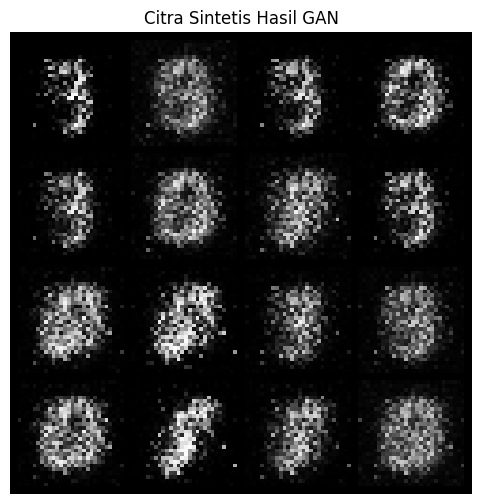

In [ ]:

with torch.no_grad():
    z = torch.randn(16, z_dim)
    fake_images = generator(z).view(-1, 1, 28, 28)
    grid = make_grid(fake_images, nrow=4, normalize=True)
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.title("Citra Sintetis Hasil GAN")
    plt.axis('off')
    plt.show()
